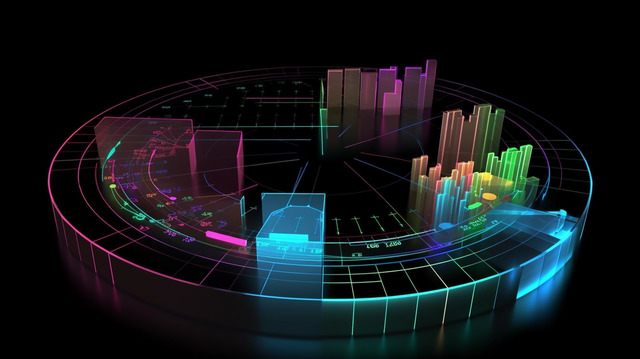

Project Title: BuzzScale IPO & Data Optimization

1. Project Recap
Goal: The main goal of this project is to optimize data analysis on social media content engagement using three datasets: content.csv, reactions.csv, and reaction_type.csv. The objective is to uncover trends and insights related to content performance and user reactions to assist in content strategy for the BuzzScale IPO.

2. Problem Statement
The project aims to:

Understand the relationship between content type and user reactions.
Identify the most popular content based on engagement metrics.
Explore the distribution of reaction types and the average reaction time to each piece of content.

Datasets:

content.csv: Contains information about social media content.
reactions.csv: Contains user reactions data, including timestamps.
reaction_type.csv: Maps reaction IDs to their type (like, love, etc.).


In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter Notebooks, to display plots inline
%matplotlib inline

Step 1: Load the datasets

In [6]:
content_df = pd.read_csv('Content.csv')
reactions_df = pd.read_csv('Reactions.csv')
reaction_type_df = pd.read_csv('ReactionTypes.csv')
cleaned_table_df = pd.read_csv('Cleaned Table.csv')
aggregate_score_df = pd.read_csv('Aggregate Score.csv')
top_5_categories_df = pd.read_csv('Top 5 Categories.csv')

In [7]:
# Check if the files were loaded correctly by displaying the first few rows
print(content_df.head())
print(reactions_df.head())
print(reaction_type_df.head())
print(cleaned_table_df.head())
print(aggregate_score_df.head())
print(top_5_categories_df.head())

   Unnamed: 0                            Content ID Content Type  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2        photo   
1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810        photo   
2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f        photo   
3           3  356fff80-da4d-4785-9f43-bc1261031dc6        photo   
4           4  01ab84dd-6364-4236-abbb-3f237db77180        video   

         Category  
0        Studying  
1  healthy eating  
2  healthy eating  
3      technology  
4            food  
         Category  Aggregate Score
0         Animals            78115
1         science            74228
2  healthy eating            72094
3      technology            71933
4            food            69511
   Unnamed: 0        Type Sentiment Type  Score
0           0       heart       positive     60
1           1        want       positive     70
2           2     disgust       negative      0
3           3        hate       negative      5
4           4  intere

In [13]:
# Display the first few rows of the datasets
print("Content Dataset:")
print(content_df.head())
print("\nReactions Dataset:")
print(reactions_df.head())
print("\nReaction Types Dataset:")
print(reaction_type_df.head())

Content Dataset:
   Unnamed: 0                            Content ID Content Type  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2        photo   
1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810        photo   
2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f        photo   
3           3  356fff80-da4d-4785-9f43-bc1261031dc6        photo   
4           4  01ab84dd-6364-4236-abbb-3f237db77180        video   

         Category  
0        Studying  
1  healthy eating  
2  healthy eating  
3      technology  
4            food  

Reactions Dataset:
         Category  Aggregate Score
0         Animals            78115
1         science            74228
2  healthy eating            72094
3      technology            71933
4            food            69511

Reaction Types Dataset:
   Unnamed: 0        Type Sentiment Type  Score
0           0       heart       positive     60
1           1        want       positive     70
2           2     disgust       negative      0
3      

In [14]:
# Display the first few rows of cleaned datasets
print("\nCleaned Table Dataset:")
print(cleaned_table_df.head())
print("\nAggregate Score Dataset:")
print(aggregate_score_df.head())
print("\nTop 5 Categories Dataset:")
print(top_5_categories_df.head())


Cleaned Table Dataset:
   Unnamed: 0                            Content ID Reaction Type  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
1           1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike   
2           2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   
3           3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
4           4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested   

           Datetime Content Type  Category Sentiment  Score  
0  07-11-2020 09:43        photo  studying  negative      0  
1  17-06-2021 12:22        photo  studying  negative     10  
2  18-04-2021 05:13        photo  studying  negative     15  
3  06-01-2021 19:13        photo  studying  negative      0  
4  23-08-2020 12:25        photo  studying  positive     30  

Aggregate Score Dataset:
         Category  Aggregate Score
0         animals            74965
1         science            71168
2  healthy eating            69339
3      technology      

Step 2: Data Cleaning & Feature Engineering (Even though the cleaned datasets are available, it's good to verify if the cleaning process was successful. Let's perform a check for missing values and duplicates.)

In [15]:
# Check for missing values in original datasets
print("Missing values in Content:", content_df.isnull().sum())
print("Missing values in Reactions:", reactions_df.isnull().sum())
print("Missing values in ReactionTypes:", reaction_type_df.isnull().sum())

Missing values in Content: Unnamed: 0      0
Content ID      0
Content Type    0
Category        0
dtype: int64
Missing values in Reactions: Category           0
Aggregate Score    0
dtype: int64
Missing values in ReactionTypes: Unnamed: 0        0
Type              0
Sentiment Type    0
Score             0
dtype: int64


In [16]:
# Drop duplicates to maintain data integrity
content_df.drop_duplicates(inplace=True)
reactions_df.drop_duplicates(inplace=True)
reaction_type_df.drop_duplicates(inplace=True)

In [17]:
# Data types check to ensure correctness
print("Content Dataset Info:")
print(content_df.info())
print("\nReactions Dataset Info:")
print(reactions_df.info())
print("\nReaction Types Dataset Info:")
print(reaction_type_df.info())

Content Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   Content ID    1000 non-null   object
 2   Content Type  1000 non-null   object
 3   Category      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None

Reactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         5 non-null      object
 1   Aggregate Score  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None

Reaction Types Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          ---

In [18]:
# Check for missing values and duplicates in the cleaned datasets
print("Missing values in Cleaned Table:", cleaned_table_df.isnull().sum())
print("Missing values in Aggregate Score:", aggregate_score_df.isnull().sum())
print("Missing values in Top 5 Categories:", top_5_categories_df.isnull().sum())

Missing values in Cleaned Table: Unnamed: 0       0
Content ID       0
Reaction Type    0
Datetime         0
Content Type     0
Category         0
Sentiment        0
Score            0
dtype: int64
Missing values in Aggregate Score: Category           0
Aggregate Score    0
dtype: int64
Missing values in Top 5 Categories: Category           0
Aggregate Score    0
dtype: int64


In [19]:
# Drop duplicates in cleaned datasets (if needed)
cleaned_table_df.drop_duplicates(inplace=True)
aggregate_score_df.drop_duplicates(inplace=True)
top_5_categories_df.drop_duplicates(inplace=True)

In [20]:
# Data types check for cleaned datasets
print("Cleaned Table Dataset Info:")
print(cleaned_table_df.info())
print("\nAggregate Score Dataset Info:")
print(aggregate_score_df.info())
print("\nTop 5 Categories Dataset Info:")
print(top_5_categories_df.info())

Cleaned Table Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB
None

Aggregate Score Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         16 non-null     object
 1   Aggregate Score  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes
None

Top 5

Step 3: Data Modeling (Creation of Final Dataset)
At this stage, you already have the cleaned datasets available, such as the Cleaned Table, Aggregate Score, and Top 5 Categories. Therefore, this step involves simply confirming the cleaned datasets and moving forward with analysis. If you need to re-check the top categories from the cleaned data:

In [21]:
# Check the structure of the Top 5 Categories dataset
print("Top 5 Categories Dataset:")
print(top_5_categories_df)

Top 5 Categories Dataset:
         Category  Aggregate Score
0         animals            74965
1         science            71168
2  healthy eating            69339
3      technology            68738
4            food            66676


Checking the shape of the datasets

In [22]:
print("Shape of Cleaned Table dataset:", cleaned_table_df.shape)
print(cleaned_table_df.head())
print("Shape of Aggregate Score dataset:", aggregate_score_df.shape)
print(aggregate_score_df.head())
print("Shape of Top 5 Categories dataset:", top_5_categories_df.shape)
print(top_5_categories_df.head())

Shape of Cleaned Table dataset: (24573, 8)
   Unnamed: 0                            Content ID Reaction Type  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
1           1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike   
2           2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   
3           3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
4           4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested   

           Datetime Content Type  Category Sentiment  Score  
0  07-11-2020 09:43        photo  studying  negative      0  
1  17-06-2021 12:22        photo  studying  negative     10  
2  18-04-2021 05:13        photo  studying  negative     15  
3  06-01-2021 19:13        photo  studying  negative      0  
4  23-08-2020 12:25        photo  studying  positive     30  
Shape of Aggregate Score dataset: (16, 2)
         Category  Aggregate Score
0         animals            74965
1         science            71168
2  healthy eating      

Inspecting Aggregate Score dataset columns

Step 4: Data Analysis (Visualizations)

Bar Chart: Top 5 Categories by Aggregate Popularity Score

<ipython-input-23-1a99078e868a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_categories_df, x='Aggregate Score', y='Category', palette='mako')


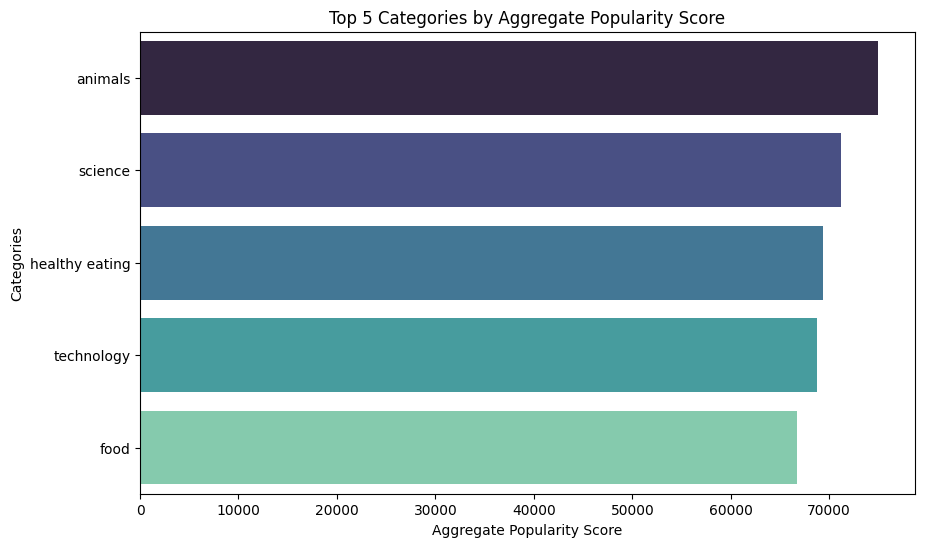

In [23]:
# Bar chart for Top 5 Categories by Aggregate Popularity Score
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_categories_df, x='Aggregate Score', y='Category', palette='mako')
plt.title('Top 5 Categories by Aggregate Popularity Score')
plt.xlabel('Aggregate Popularity Score')
plt.ylabel('Categories')
plt.show()

Pie Chart: Popularity Percentage Share of Top 5 Categories

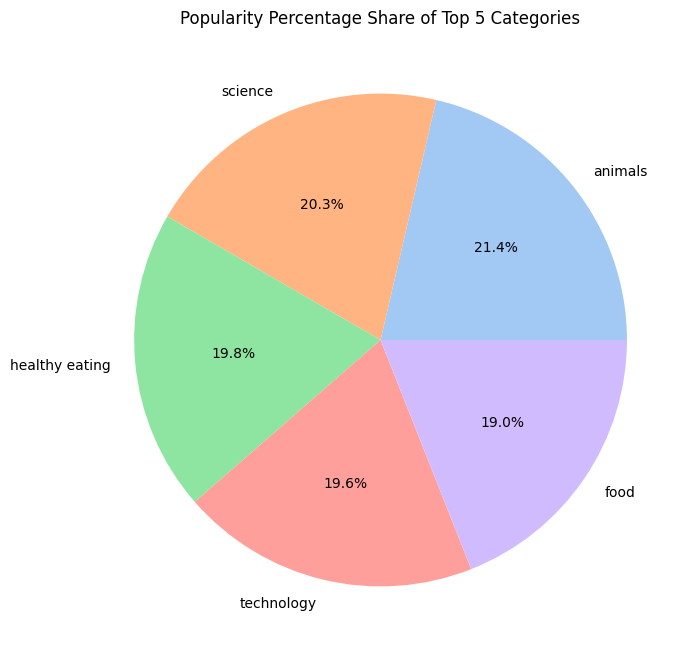

In [24]:
# Pie chart for Popularity Share of Top 5 Categories
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories_df['Aggregate Score'], labels=top_5_categories_df['Category'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Popularity Percentage Share of Top 5 Categories')
plt.show()


Conclusion

Analysis
Animals and science are the two most popular categories, indicating that Social Buzzs audience is most engaged with real-life and factual content. These categories consistently receive the highest number of reactions, showing a strong preference for this type of content.

Insight
Food-related themes appear multiple times in the top 5 categories, with "Healthy Eating" being the most prominent. This suggests that your audience has a significant interest in food and wellness. Social Buzz could create targeted campaigns around healthy eating, potentially collaborating with food or wellness brands to increase engagement and attract new users.

Next Steps
To enhance content performance, we recommend implementing automated systems for continuous, real-time analysis. This will enable faster, data-driven decisions. We can help set up dashboards for real-time insights and optimize your content strategy to boost engagement across all categories.

By leveraging these insights, Social Buzz can improve content relevance, engage users more effectively, and build valuable partnerships with brands that align with audience interests.
